In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn import datasets

# For splitting data into groups
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# For modeling functions
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import xgboost as XGB


# Data Visualize
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load your CSV file into a DataFrame
df = pd.read_csv('G:\CSE 445 Project/diabetes.csv')

# Specify the features (X) and the target variable (y)
X = df.drop('Outcome', axis=1)  # Replace 'target_column' with the actual column name of your target variable
y = df['Outcome']

# Split the data into training and testing sets
# Adjust the test_size and random_state parameters as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have your training and testing sets ready to use
# X_train, y_train: Training data and labels
# X_test, y_test: Testing data and labels
print("Original DataFrame Shape:", df.shape)

# Split the data into training and testing sets
# Adjust the test_size and random_state parameters as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the new DataFrames after splitting
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

# Display the first few rows of the new DataFrames
print("\nX_train Head:\n", X_train.head())
print("\nX_test Head:\n", X_test.head())
print("\ny_train Head:\n", y_train.head())
print("\ny_test Head:\n", y_test.head())
# Combine features and target variable for both train and test sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the train and test data to new CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

Original DataFrame Shape: (768, 9)
X_train Shape: (614, 8)
X_test Shape: (154, 8)
y_train Shape: (614,)
y_test Shape: (154,)

X_train Head:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  

X_test Head:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112    

In [5]:
percentage_null = (train_data.isnull().sum()/len(train_data) * 100).sort_values(ascending=False)  #null values er percentage.koto percentnull ase
np.round(percentage_null.head(19), 2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [6]:
df_transform =train_data

In [7]:
df_transform.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
catvars = df_transform.select_dtypes(include=['object']).columns
numvars = df_transform.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns

In [9]:
catvars.to_list()

[]

In [10]:
numvars.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
np.round(df_transform.describe(exclude=[object]))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0
mean,4.0,121.0,69.0,20.0,81.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,15.0,116.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,100.0,64.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,42.0,32.0,0.0,29.0,0.0
75%,6.0,139.0,80.0,32.0,130.0,36.0,1.0,40.0,1.0
max,17.0,199.0,122.0,63.0,846.0,67.0,2.0,81.0,1.0


In [12]:
df_transform.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1


In [13]:
def uniqueval(col):
    print(f'Details of particular col {col} is {df_transform[col].unique()}')

def value_couts(col):
    print(f'Valuecounts of particular col {col} is {df_transform[col].value_counts()}')


for col in df_transform.columns:
    uniqueval(col)
    print('-' * 150)  #separating unique values

Details of particular col Pregnancies is [ 2  9  1  0  6  4 10  3  7  5 12 13  8 11 15 14 17]
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of particular col Glucose is [ 84 112 139 161 134 130 132 108  80  87 171  88 146 191 122 159 100 123
 155 102 125 104 131 145 152 147 128 194  78 106 129  61  81  99 107 170
  85  97 127 133  94  83 187 111 143 124 165 137 179 101 120  89 119 109
 105  77  95 135 103  82 138 117 110   0 115 142 116 126  79  90 160 162
 144 114 180 168 195  76  86 189  73 196 158 121 151 141 153 181 136 164
 148 190  68 197 186  91 154 173 169 118 188  93 157 163 150 113 174 166
 140 193 184 183  65  57  56  92 156 176  72  96  67 182  98  75 149  71
  44 175 198 178 167 199  74]
------------------------------------------------------------------------------------------------------------------------------------------------------
Details of particular col 

In [14]:
df_transform = df_transform.loc[:, ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']]

In [15]:
df_transform.head() #after transforming if the catagories are okay or not

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1


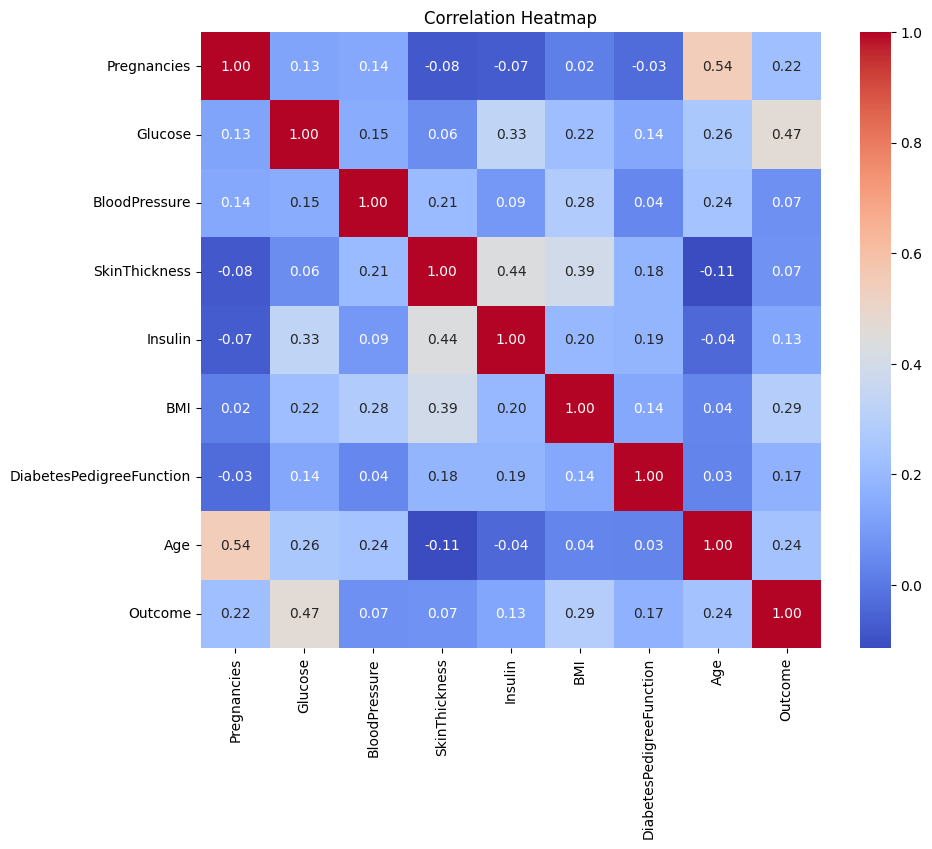

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [17]:
df_transform.corr()['Outcome'] #calculating correlation of sales price with every other column. overallqual has high correlation
#and lot area has less

Pregnancies                 0.207550
Glucose                     0.456117
BloodPressure               0.082046
SkinThickness               0.057912
Insulin                     0.108498
BMI                         0.306335
DiabetesPedigreeFunction    0.154560
Age                         0.280654
Outcome                     1.000000
Name: Outcome, dtype: float64

In [18]:
test = (df_transform['Outcome'])# log transformation
train = df_transform.drop(['Outcome'], axis=1)

In [19]:
test.head()  #after standarizing it we can see it comes close to 12

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [20]:
train.head() #have to use this log transformation result for later prediction

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Create a logistic regression model
step_1 = LogisticRegression()

# Step 2: Create a pipeline
pipe = Pipeline([
    ('step_1', step_1)
])

# Step 3: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = pipe.predict(X_test)

# Step 5: Evaluate the performance using classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional classification metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
[[78 21]
 [18 37]]


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Assuming X_train, X_test, y_train, y_test are already defined

# Define a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Define hyperparameters to tune for four experiments
param_grid = [
    {'classifier__C': [0.001, 0.01, 0.1, 1], 'classifier__penalty': ['l2'], 'classifier__max_iter': [50, 100]},
    {'classifier__C': [1, 10, 100], 'classifier__penalty': ['l1'], 'classifier__max_iter': [50, 100]},
    {'classifier__C': [0.001, 0.01, 0.1, 1], 'classifier__penalty': ['l2'], 'classifier__max_iter': [200, 300]},
    {'classifier__C': [1, 10, 100], 'classifier__penalty': ['l1'], 'classifier__max_iter': [200, 300]}
]

# Use StratifiedKFold for cross-validation with stratified sampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the results of the grid search
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))



Best Hyperparameters: {'classifier__C': 1, 'classifier__max_iter': 50, 'classifier__penalty': 'l2'}
Best Accuracy: 0.7654404904704785
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
[[79 20]
 [18 37]]


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Assuming X_train, X_test, y_train, y_test are already defined

# Define a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Define hyperparameters to tune for four experiments
param_grid = [
    {'classifier__C': [0.001, 0.01, 0.1, 1], 'classifier__penalty': ['l2'], 'classifier__max_iter': [50, 100]},
    {'classifier__C': [1, 10, 100], 'classifier__penalty': ['l1'], 'classifier__max_iter': [50, 100]},
    {'classifier__C': [0.001, 0.01, 0.1, 1], 'classifier__penalty': ['l2'], 'classifier__max_iter': [200, 300]},
    {'classifier__C': [1, 10, 100], 'classifier__penalty': ['l1'], 'classifier__max_iter': [200, 300]}
]

# Use StratifiedKFold for cross-validation with stratified sampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the results of the grid search for all hyperparameter combinations
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f'Mean Accuracy: {mean_score:.4f} for Hyperparameters: {params}')

# Print the best hyperparameters and accuracy
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification metrics for the best model
print('\nClassification Report for Best Model:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix for Best Model:')
print(confusion_matrix(y_test, y_pred))


Mean Accuracy: 0.6531 for Hyperparameters: {'classifier__C': 0.001, 'classifier__max_iter': 50, 'classifier__penalty': 'l2'}
Mean Accuracy: 0.6531 for Hyperparameters: {'classifier__C': 0.001, 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Mean Accuracy: 0.7540 for Hyperparameters: {'classifier__C': 0.01, 'classifier__max_iter': 50, 'classifier__penalty': 'l2'}
Mean Accuracy: 0.7540 for Hyperparameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Mean Accuracy: 0.7589 for Hyperparameters: {'classifier__C': 0.1, 'classifier__max_iter': 50, 'classifier__penalty': 'l2'}
Mean Accuracy: 0.7589 for Hyperparameters: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Mean Accuracy: 0.7654 for Hyperparameters: {'classifier__C': 1, 'classifier__max_iter': 50, 'classifier__penalty': 'l2'}
Mean Accuracy: 0.7654 for Hyperparameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2'}
Mean Accur